initial directory
C:\Users\Ibano\Anaconda3\jupyter\LIBS
LibWavelength [ 370.7922  426.9382  449.4497  484.381   488.6899  505.3276  522.4657
  551.4676]
fil_i [1]
i 1
loop number=1, dir?
C:\Users\Ibano\Anaconda3\jupyter\LIBS\20181009test\ME5000
cdat/A_001.cdat
Spectral-fit #0 is DONE
['m1=370.84 ', 'sd1=0.16 ', 'a1=1.02e+03 ', 'BG=1.892e+02x-6.569e+04 ', 'eqint=1.02e+03 ']
Spectral-fit #1 is DONE
['m1=427.01 ', 'sd1=0.44 ', 'a1=6.70e+03 ', 'BG=-6.759e+02x+2.947e+05 ', 'eqint=6.69e+03 ']
Spectral-fit #2 is DONE
['m1=449.67 ', 'sd1=0.11 ', 'a1=2.93e+02 ', 'BG=-3.741e+01x+2.075e+04 ', 'eqint=2.93e+02 ']
Spectral-fit #3 is DONE
['m1=484.32 ', 'sd1=0.22 ', 'a1=2.97e+03 ', 'BG=1.822e+02x-8.547e+04 ', 'eqint=2.97e+03 ']
Spectral-fit #4 is DONE
['m1=488.71 ', 'sd1=0.26 ', 'a1=3.25e+03 ', 'BG=-1.489e+02x+7.544e+04 ', 'eqint=3.25e+03 ']
Spectral-fit #5 is DONE
['m1=505.76 ', 'sd1=0.12 ', 'a1=2.17e+02 ', 'BG=-7.682e+01x+4.124e+04 ', 'eqint=2.17e+02 ']
Spectral-fit #6 is DONE
['m1=522.46 ', 'sd1=0

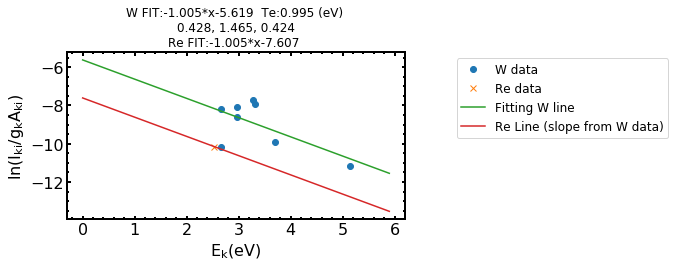

35.8679491969 35.8679491969 0.147922622095 0.879552850437 0.120447149563
35.8679491969 35.8679491969 0.147922622095 0.879552850437 0.120447149563


In [1]:
%matplotlib inline
#行番号 esc+l(エル)
import os
import numpy as np
import scipy as sp
import scipy.optimize as opt
import math as math
import matplotlib.pyplot as plt
import itertools as IT
from scipy import integrate
from scipy.integrate import simps
from scipy.signal import argrelmax
from scipy import stats

###IMPORT ORIGINAL FUNCTIONS##################################################
from func000_Plotset import plot_ini
from func000_Plotset import plotset
plot_ini()
from func001_PeakFit_sugihara import norm
from func001_PeakFit_sugihara import peakfind
from func001_PeakFit_sugihara import peakfit
#iはファイル番号に対応　i=1>A001.cdat
fil_i=list(range(1,2,1))
#fil_i=list(range(1,25,1))+list(range(26,34,1)) # a1以上a2未満までを2ステップで作成　b = list(range(a1, a2, 2))

###INITIAL PATH AND IN/OUT FILE NAMES#########################################
pathINITI="C:/Users/Ibano/Anaconda3/jupyter/LIBS"
pathDATA="20181009test/ME5000"
pathOUT="PeakAndIntensity.dat"
pathOUT2="BoltzmannPlot.dat"
pathOUT3="summary.dat"
path2nd="W-Re_fitting.dat"
flib1="../../lib/W-I.sdat"
lib1=flib1

label1st='W data'
label2nd='Re data'
Mat1st='W'
Mat2nd='Re'
Mat="W-Re"
label3='Fitting W line'
label4='Re Line (slope from W data)'

pathPARTW="../../../../lib/partition_func/Re-I-WRe_pf.dat"
pathPARTW2="../../../../lib/partition_func/Re-I-WRe_pf.dat"
i=1
fil_a=[""]*99
while i<99:
    if i<10:
        fil_a[i-1]='cdat/A_00{0:}.cdat'.format(i)
    if i>9:
        fil_a[i-1]='cdat/A_0{0:}.cdat'.format(i)
    i += 1
file_list=fil_a

#f1="cdat/MechelleSpect_001.cdat"
#f2="cdat/MechelleSpect_002.cdat"
#f3="cdat/MechelleSpect_003.cdat"
#f4="cdat/MechelleSpect_004.cdat"
#file_list=[f1,f2,f3,f4]

x_fit=np.arange(0,6,.1)
    
###INITIAL VALUABLES FOR PEAK FITTING#########################################
sd1= 0.03
a1= 4.0e3
##############################################################################

os.chdir(pathINITI)
print("initial directory")
init_dir=os.getcwd()
print(os.getcwd())
os.chdir(pathDATA)

######READING W LIBRARY DATA####################################
################################################################
#for lib1 in lib_list:
with open(lib1, 'rb') as lib:
#    sdat = IT.chain(IT.islice(lib, 0), IT.islice(lib, 4, None))
    FL = np.genfromtxt(lib,delimiter=None,skip_header=4) #np.genfromtxt(sdat)
LibWavelength,LibWave1,LibWave2 = FL[:,0],FL[:,1],FL[:,2]
LibAki,LibFik,LibEi = FL[:,3],FL[:,4],FL[:,5]
LibEk,LibGi,LibGk = FL[:,6],FL[:,7],FL[:,8]
print("LibWavelength",LibWavelength)
######READING EXPERIMENTAL SPECTRUM DATA########################
if not os.path.exists('python'):
    os.makedirs('python')

loop_dir=os.getcwd()
print("fil_i",fil_i)
kp=0
for i in fil_i:
    print("i",i)
    kp+=1
    file1=file_list[i-1]    
    print("loop number={}, dir?".format(i))
    print(os.getcwd())
    print(file1)
    with open(file1, 'rb') as file:
        SPEC = np.loadtxt(file, skiprows=12,delimiter=None,  unpack=True)
    datapath='MechelleSpect_00{0:}'.format(i)

    if not os.path.exists('python/'+datapath):
        os.makedirs('python/'+datapath)

    os.chdir('python/'+datapath)
    XX=SPEC[0]
    YY=SPEC[1]
#################################################################

    ###plotting entire spectrum###########    
    plt.plot(XX,YY);
    plt.xlabel('Wavelengh[nm]');
    plt.ylabel('Intensity [cps]');
    plt.savefig("004-1_Spectral.png",format = 'png', dpi=300)
    plt.close()
    ######################################
    
    
###Peak fitting for individual peaks at experimental data################### 
    with open(pathOUT, mode='w') as f:
        f.write("x_peak,x_min,x_max,Aki,Fik, Ei,Ek,Gi,Gk,Integral,Ln(IperGA) \n")
        
    if not os.path.exists('Wfitting'):
        os.makedirs('Wfitting')
    os.chdir('Wfitting')
    k=0
    for WL1 in LibWavelength:
        nx=100
        ###Using data from library for initial values at fitting############
        x_peak=LibWavelength[k]
        x_min=LibWave1[k]
        x_max=LibWave2[k]
        Aki,Fik, Ei,Ek,Gi,Gk = LibAki[k],LibFik[k],LibEi[k],LibEk[k],LibGi[k],LibGk[k]
        ###Peak fitting and Integration#####################################
        ###1st step: correction for peak shift##############################
        del_x=peakfind(x_peak,x_min,x_max,nx,XX,YY,k)
        x_peak += del_x
        x_min -= abs(del_x)
        x_max += abs(del_x)
        ###2nd step: first fitting for peak dispertion determination######
        Integral,m1_cal,sd_cal=peakfit(x_peak,x_min,x_max,nx,XX,YY,sd1,a1,k,0) 
        x_peak=m1_cal
        x_min=x_peak-sd_cal*10
        x_max=x_peak+sd_cal*10
        ###3rd step: final fitting for the peak#############################
        Integral,m1_cal,sd_cal=peakfit(x_peak,x_min,x_max,nx,XX,YY,sd1,a1,k,1)
        ####################################################################            
        ###output of peak fitting data######################################            
        dataset=[Aki,Fik, Ei,Ek,Gi,Gk]
        IperGA=np.log(Integral/Gk/Aki)
        output=np.c_[x_peak,x_min,x_max,Aki,Fik, Ei,Ek,Gi,Gk,Integral,IperGA]
        with open("../"+pathOUT, mode='ab') as f:
            np.savetxt(f,output, fmt='%.4e',delimiter=', ')
        ####################################################################    
        k+=1
    
    os.chdir("../")
###Boltzmann plot and fitting for Te and intercept#########################  
    with open(pathOUT, 'rb') as path:
        RESULT = np.genfromtxt(path,delimiter=',',skip_header=1)
    print("RESULT")
    #print(RESULT)
    RESULT=RESULT[~np.isnan(RESULT).any(axis=1)]
    #print(RESULT)
    
#    RESULT = np.loadtxt(pathOUT, delimiter=',', skiprows=1)
    
    Ek_result=RESULT[:,6]
    IperGA_result=RESULT[:,10]
    
    m, qs = np.polyfit(Ek_result, IperGA_result, 1)# 1st order line fitting    
    p = [m, qs] # Initial guesses for leastsq

    def line(p, x, y):
      slope, intercept = p
      y_temp = slope*x + intercept
      err = y - y_temp
      return err
    
    #IperGA_result =[28.060805,29.714654,27.074535,30.195656,29.576861,30.925483, 30.198635, 30.773779]
    
    out = opt.leastsq(line, p, args = (Ek_result,IperGA_result))
    m, qs= out[0]
    
    x=Ek_result
    y=IperGA_result
    N=len(x)
    err=(sum((y-(m*x+qs))**2)/N)**0.5
    errm=err*(N/(N*sum(x**2)-sum(x)**2))**0.5
    errqs=err*(sum(x**2)/(N*sum(x**2)-sum(x)**2))**0.5
    y_fit = m * x_fit + qs
    kB = 8.617e-5
    Te = -1.0/m
    errTe = 1.0/m/m*errm #誤差の伝搬
    ###READ PARTITION FUNCTION##############################################
    print("current dir",os.getcwd())
    dataUs = np.loadtxt(pathPARTW, delimiter='  ', skiprows=2)
    xTe=dataUs[:,0] # Te 
    yUs=dataUs[:,1] # Us(Partition function)
    
    j=0
    while xTe[j] < Te:
        xTe1=xTe[j]
        xTe2=xTe[j+1]
        j += 1
    Us = (yUs[j]-yUs[j-1])/(xTe[j]-xTe[j-1])*(Te-xTe[j-1])+yUs[j-1]
    ###now we have qs and Us for 1st element(W)#############################
    ######################################################################## 
    ###READ 2nd ELEMENT SIGNAL############################################## 
    RESULT2 = np.loadtxt(path2nd, delimiter=',', skiprows=1)
    
    Ek2_result=RESULT2[6]
    IperGA2_result=RESULT2[10]
    ###Making line for the 2nd element signal############################### 
    #y=m2 * x+ qs2,m2=m ==> qs2 =y-m*x
    m2=m
    qs2=IperGA2_result-m2*Ek2_result
    y2_fit=m2 * x_fit + qs2
    ###READ PARTITION FUNCTION##############################################
    
    dataUs = np.loadtxt(pathPARTW2, delimiter='  ', skiprows=2)
    xTe2=dataUs[:,0] # Te 
    yUs2=dataUs[:,1] # Us(Partition function)
    
    j=0
    while xTe2[j] < Te:
        xTeI=xTe[j]
        xTeII=xTe[j+1]
        j += 1
        
    Us2 = (yUs2[j]-yUs2[j-1])/(xTe2[j]-xTe2[j-1])*(Te-xTe2[j-1])+yUs2[j-1]
    ########################################################################
    ###Determination of experimental factor F###############################
    F = Us*np.exp(qs)+Us2*np.exp(qs2)
    ########################################################################
    ###Determination of concentration#######################################
    Cs=Us/F*np.exp(qs)
    Cs2 = Us2/F*np.exp(qs2)
    ######################################################################## 
    
    ####Plotting Boltzmann##################################################
    plt.plot(Ek_result, IperGA_result,'o', label=label1st)
    plt.plot(Ek2_result, IperGA2_result,'x', label=label2nd)
    plt.plot(x_fit, y_fit,'-', label=label3)
    plt.plot(x_fit, y2_fit,'-', label=label4)
    title=Mat1st+' FIT:{0:+3.3f}*x{1:+3.3f}  Te:{2:3.3f} (eV) \n'.format(m, qs, Te)
    title=title+"{0:3.3f}, {1:3.3f}, {2:3.3f}\n".format(errm,errqs,errTe)
    title=title+Mat2nd+' FIT:{0:+3.3f}*x{1:+3.3f} '.format(m2, qs2)
    plt.title(title,fontsize=12)
    plt.xlabel('$\mathsf{E_k (eV)}$')
    plt.ylabel('$\mathsf{ln(I_{ki}/g_k A_{ki})}$')
    plotset()
    plt.legend(loc='upper right',bbox_to_anchor=(1.8,1),fontsize=12)
    plt.savefig("4-5_Bolzmann.png",format = 'png', dpi=300)
    plt.show()
    ########################################################################
    ####Writing data (overwrite if exsited)#################################
    with open(pathOUT2, mode='w') as f:
        f.write(" slope, Te, errTe, intercept, errInter, Us, F, Cs,Cs2 \n")
    output2=np.c_[m, Te, errTe, qs, errqs, Us, F, Cs, Cs2]
    print(Us, Us2, F, Cs, Cs2)
    with open(pathOUT2, mode='ab') as f:
        np.savetxt(f,output2, fmt='%.4e',delimiter=', ')
    ########################################################################
    ####Writing summary data (overwrite)####################################
    if kp==1:
        with open("../"+pathOUT3, mode='w') as f:
            f.write("filename, Te(eV), errTe(eV), "+Mat1st+"-I, "+Mat2nd+"-I in "+Mat+"\n")

        print(Us, Us2, F, Cs, Cs2)
    
    ####Writing summary data################################################
    output3=np.c_[Te, errTe, Cs, Cs2]
    with open("../"+pathOUT3, mode='a') as f:
        f.write(datapath+', ')
    with open("../"+pathOUT3, mode='ab') as f:
        np.savetxt(f,output3, fmt='%.4e',delimiter=', ')
    ########################################################################
    os.chdir(loop_dir)
############################################################################


os.chdir(init_dir)
    
############################################################################
